In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [35]:
#import clean data set
df = pd.read_csv('medical_data_clean.csv', index_col = 0)

In [36]:
df = df[['Population', 'Children', 'Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [37]:
df.head()

,Population,Children,Age,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges
0,2951,1.0,53.0,86575.93,6,10.585770,3191.048774,17939.403420
1,11303,3.0,51.0,46805.99,4,15.129562,4214.905346,17612.998120
2,17125,3.0,53.0,14370.14,4,4.772177,2177.586768,17505.192460
3,2162,0.0,78.0,39741.49,4,1.714879,2465.118965,12993.437350
4,5287,1.0,22.0,1209.56,5,1.254807,1885.655137,3716.525786


In [38]:
#normalize the data
df_normalized = (df - df.mean()) / df.std()

In [44]:
pca = PCA(n_components = df.shape[1])

In [45]:
pca.fit(df_normalized)
df_pca = pd.DataFrame(pca.transform(df_normalized),
                      columns = ['Population', 'Children', 'Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges'])

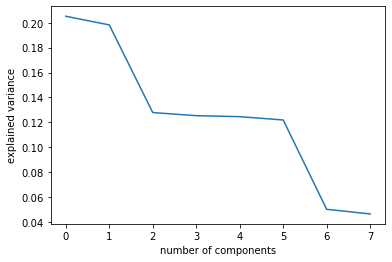

In [46]:
#create scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()
#plt.savefig('PCA Scree Plot.jpg')

In [25]:
#get eigenvalues
cov_matrix = np.dot(df_normalized.T, df_normalized) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

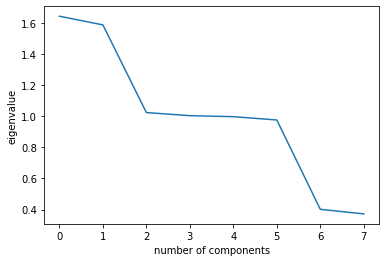

In [26]:
#plot eigenvalues as screen plot
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()
#plt.savefig('Eigenvalue Plot.jpg')

In [27]:
#generate loading values
loadings = pd.DataFrame(pca.components_.T,
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
                        index = df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population,0.005608,0.047810,0.467225,0.230919,0.730639,0.438229,0.003395,0.013046
Children,0.015521,0.001633,0.222579,0.877860,-0.194569,-0.376248,0.004023,0.011845
Age,0.576641,-0.408345,-0.007545,-0.005245,0.008606,0.017317,-0.319423,0.631071
Income,-0.012265,-0.006172,0.570015,-0.070915,-0.644352,0.504598,-0.003589,0.006563
Doc_visits,0.001001,-0.019686,0.637943,-0.412477,0.108081,-0.640908,-0.006938,0.003148
Initial_days,0.398724,0.583725,-0.001845,-0.010128,-0.021859,-0.010938,-0.636120,-0.308111
TotalCharge,0.419771,0.567584,-0.005562,-0.026758,-0.027695,-0.015155,0.637068,0.306662
Additional_charges,0.576085,-0.409456,0.013364,0.005065,0.010918,0.019006,0.295594,-0.642193
